Image Classification Using CNN
By : Ibrahim Alkanatri

we'll build a CNN using Keras to use it classifying thousands of pictures in 5 different categories

Data link : https://www.kaggle.com/ibrahimalk/5natural-scenes-images-dataset

first to import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras


Using TensorFlow backend.


now to define the path 

In [2]:

trainpath = '../input/5-Natural_Scenes_Images_Dataset/'
testpath = '../input/5-Natural_Scenes_Images_Dataset/'
validationpath = '../input/5-Natural_Scenes_Images_Dataset/'


Open Folders
now let's first check the Train folder to have a look to its content

In [3]:
for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2274 in folder sea
For training data , found 2271 in folder forest
For training data , found 2512 in folder mountain
For training data , found 2404 in folder glacier
For training data , found 2191 in folder buildings


ok , how about the test folder

In [4]:
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 510 in folder sea
For testing data , found 474 in folder forest
For testing data , found 525 in folder mountain
For testing data , found 553 in folder glacier
For testing data , found 437 in folder buildings


Checking Images
now we need to heck the images sizes , to know ow they looks like

since we have 5 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [5]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4 }

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

now how about the images sizes in train folder

In [6]:
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    11605
(113, 150, 3)        6
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

ok , almost all of them are 150,150,3 , how about test images ?

In [7]:
size = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2492
(72, 150, 3)        1
(110, 150, 3)       1
(149, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(131, 150, 3)       1
dtype: int64

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

Reading Images
now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [8]:
s = 100

now to read all pictues in five categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function

In [9]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

great , now how many items in X_train

In [10]:
print(f'we have {len(X_train)} items in X_train')

we have 11652 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

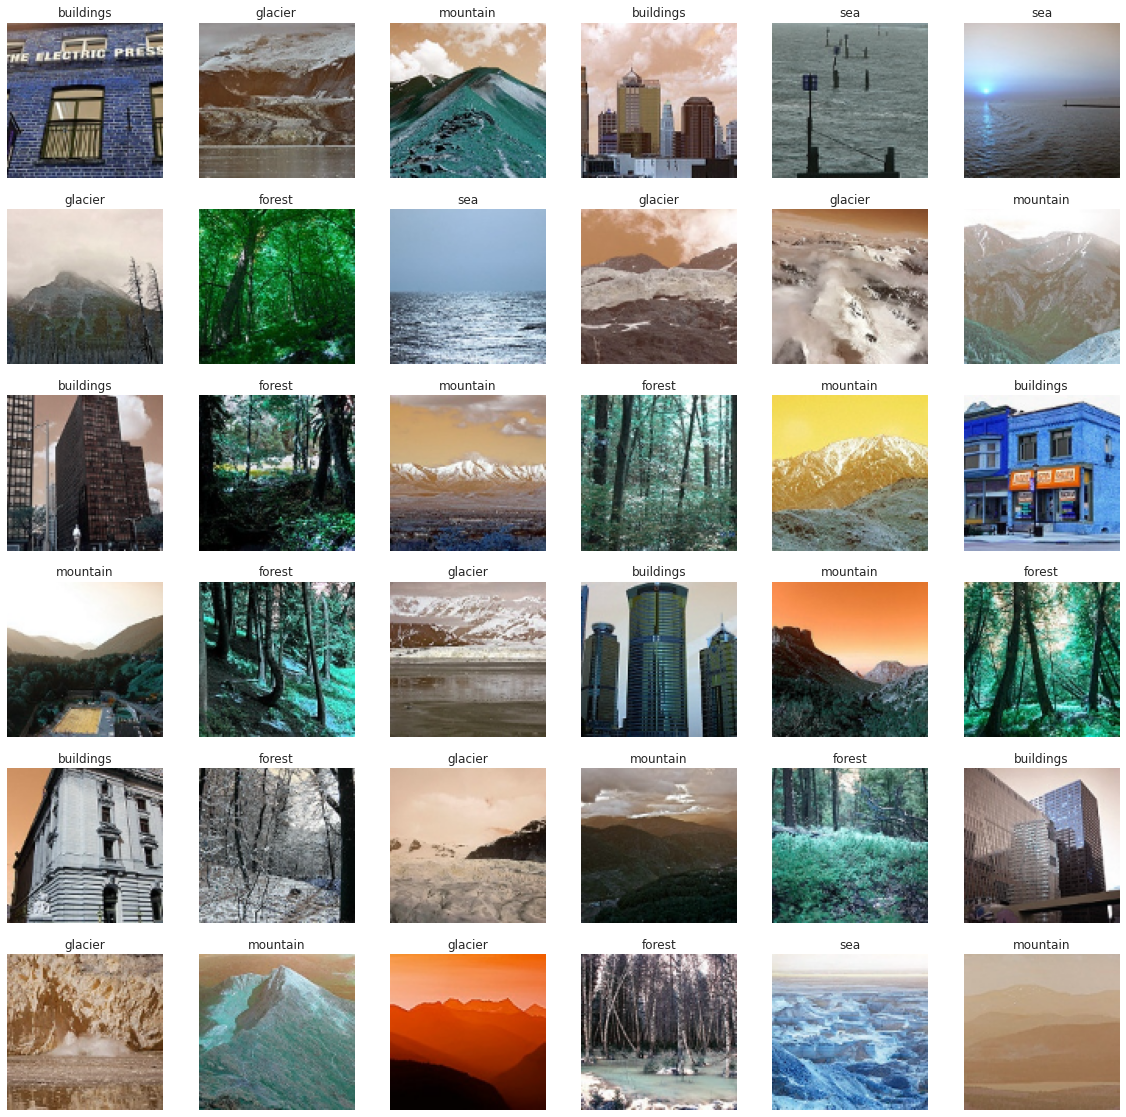

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

great , now to repeat same steps exactly in test data

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str(testpath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 2499 items in X_test


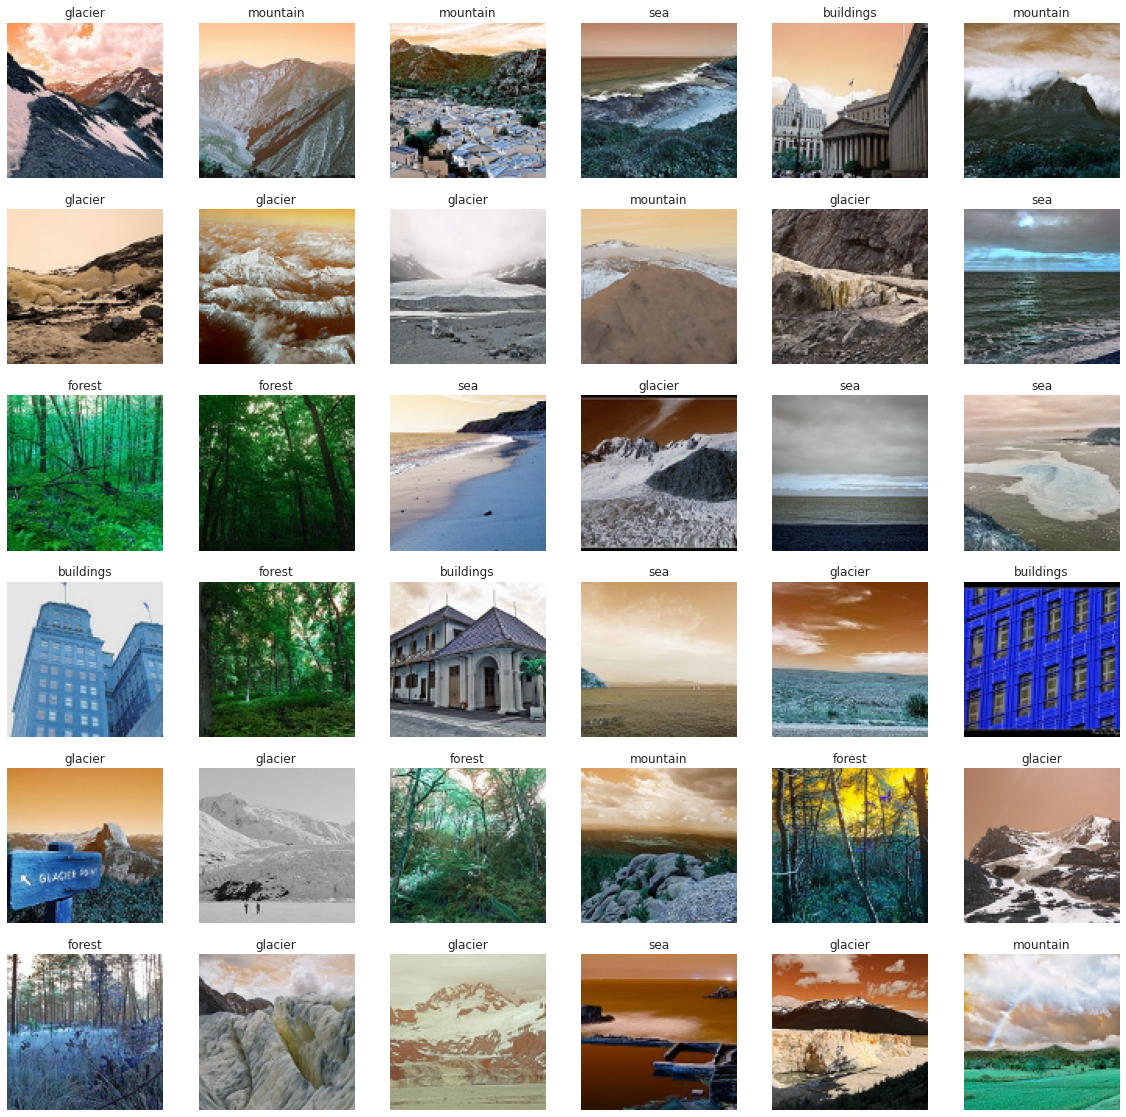

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

now to read all pictues in five categories in validation folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function

In [15]:
X_val = []
y_val = []
for folder in  os.listdir(trainpath +'validation') : 
    files = gb.glob(pathname= str( trainpath +'validation//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_val.append(list(image_array))
        y_val.append(code[folder])

Building The Model
now we need to build the model to train our data

first to convert the data into arrays using numpy

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (11652, 100, 100, 3)
X_test shape  is (2499, 100, 100, 3)
y_train shape  is (11652,)
y_test shape  is (2499,)


now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [19]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(5,activation='softmax') ,    
        ])

Instantiate the Tensorboard to make visualization for our model and its result.

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [21]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ?

In [22]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

now to train the model , lets use 50 epochs now

In [23]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1,validation_data=(X_val, y_val))


Train on 11652 samples, validate on 1000 samples
Epoch 1/50
11652/11652 [==============================] - 27s 2ms/step - loss: 1.3631 - accuracy: 0.4697 - val_loss: 0.9738 - val_accuracy: 0.5690
Epoch 2/50
11652/11652 [==============================] - 23s 2ms/step - loss: 0.9924 - accuracy: 0.5965 - val_loss: 0.9252 - val_accuracy: 0.6410
Epoch 3/50
11652/11652 [==============================] - 23s 2ms/step - loss: 0.8954 - accuracy: 0.6390 - val_loss: 1.0766 - val_accuracy: 0.5880
Epoch 4/50
11652/11652 [==============================] - 23s 2ms/step - loss: 0.8726 - accuracy: 0.6532 - val_loss: 0.6951 - val_accuracy: 0.7440
Epoch 5/50
11652/11652 [==============================] - 23s 2ms/step - loss: 0.7540 - accuracy: 0.7250 - val_loss: 0.7013 - val_accuracy: 0.7160
Epoch 6/50
11652/11652 [==============================] - 23s 2ms/step - loss: 0.6768 - accuracy: 0.7622 - val_loss: 0.6473 - val_accuracy: 0.7350
Epoch 7/50
11652/11652 [==============================] - 23s 2ms/ste

how is the final loss & accuracy

In [24]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2499/2499 [==============================] - 2s 742us/step
Test Loss is 1.278938873473336
Test Accuracy is 0.8363345265388489


In [29]:
accuracy = ThisModel.history['accuracy']
val_accuracy = ThisModel.history['val_accuracy']
loss = ThisModel.history['loss']
val_loss = ThisModel.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'val_acc'